# Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
!pip install category-encoders

from category_encoders.target_encoder import TargetEncoder

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
pd.set_option('display.max_columns', None) # para o pandas mostrar todas as colunas do dataframe(df)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # para o pandas mostrar todas as colunas do dataframe(df)

# Dicionário variáveis

In [ ]:
dicio = pd.read_csv("/content/drive/MyDrive/CASES_GITHUB/01_Case_CGB_jul22/Case 1 - dicionario.csv", header = 0)
display(dicio) 

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


# DESAFIO: Como potencializar o recebimento de leads dos anúncios Webmotors?


Considerações importantes:
* leads = total de propostas recebidas
* Views e cliques por telefone são antecessores aos leads
* Potencializar por significar: ou aumentar de 1 lead para mais leads; ou sair de 0 lead para 1 lead. 


# DADOS IMPORTADOS: qual a aparência?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CASES_GITHUB/01_Case_CGB_jul22/Case 1 - dados.csv", header = 0)

In [ ]:
df.head()#cabeçalho 
#case_df.tail() #final base
#case_df.shape


,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,...,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,...,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,...,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,...,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,...,S,S,S,S,S,S,S,S,N,N


In [ ]:
#observar o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48665 entries, 0 to 48664
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_anuncio                        48665 non-null  int64  
 1   cod_cliente                        48665 non-null  int64  
 2   cod_tipo_pessoa                    48665 non-null  int64  
 3   prioridade                         48665 non-null  int64  
 4   leads                              48665 non-null  int64  
 5   views                              48665 non-null  int64  
 6   cliques_telefone*                  48665 non-null  int64  
 7   cod_marca_veiculo                  48665 non-null  int64  
 8   cod_modelo_veiculo                 48665 non-null  int64  
 9   cod_versao_veiculo                 48665 non-null  int64  
 10  ano_modelo                         48665 non-null  int64  
 11  cep_2dig                           48665 non-null  int

In [ ]:
#verifico percentual de dados faltantes - missing values
#case_df.isna().sum()
df.isnull().mean().round(4)*100

cod_anuncio                           0.00
cod_cliente                           0.00
cod_tipo_pessoa                       0.00
prioridade                            0.00
leads                                 0.00
views                                 0.00
cliques_telefone*                     0.00
cod_marca_veiculo                     0.00
cod_modelo_veiculo                    0.00
cod_versao_veiculo                    0.00
ano_modelo                            0.00
cep_2dig                              0.00
uf_cidade                             0.00
vlr_anuncio                           0.00
qtd_fotos                             0.00
km_veiculo                            0.00
vlr_mercado                          12.78
flg_unico_dono                        0.00
flg_licenciado                        0.00
flg_ipva_pago                         0.64
flg_todas_revisoes_concessionaria     0.64
flg_todas_revisoes_agenda_veiculo     0.00
flg_garantia_fabrica                  0.64
flg_blindad

Consideração inicial: 

* vlr_mercado nan =  12.78 %
* flgs e airbag com percentual baixo de nan
* Dados categóricos estão como descritivos. 
* dtypes = float64(7), int64(19), object(15)
* 48665 observações e 41 colunas. 

# PRÉ TRATAMENTO

* Atualizar nome coluna
* split colunas
* Criar variáveis úteis no entendimento do problema
* Excluir colunas não mais úteis
* Preencher dados faltantes ou excluir
* Organizar dataframe

## Colunas - split

In [ ]:
df_tratado = df.rename(columns = {'cliques_telefone*':'cliques_telefone'})

In [ ]:
df_tratado.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,...,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,...,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,...,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,...,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,...,S,S,S,S,S,S,S,S,N,N


In [ ]:
df_tratado['uf_cidade']

0              GO_Itumbiara
1                 SP_Osasco
2             SP_SÃ£o Paulo
3             SP_SÃ£o Paulo
4             SP_SÃ£o Paulo
                ...        
48660               SP_JaÃº
48661    RJ_Duque de Caxias
48662           SP_JundiaÃ­
48663           SP_JundiaÃ­
48664           SP_JundiaÃ­
Name: uf_cidade, Length: 48665, dtype: object

In [ ]:
df_tratado['uf'] = df_tratado['uf_cidade'].str[:2]

In [ ]:
df_tratado['cidade']=df_tratado['uf_cidade'].str[3:]

In [ ]:
df_tratado[['uf' , 'cidade']]

,uf,cidade
0,GO,Itumbiara
1,SP,Osasco
2,SP,SÃ£o Paulo
3,SP,SÃ£o Paulo
4,SP,SÃ£o Paulo
...,...,...
48660,SP,JaÃº
48661,RJ,Duque de Caxias
48662,SP,JundiaÃ­
48663,SP,JundiaÃ­


In [ ]:
#retirar cep já que tem uf.
df_tratado = df_tratado.drop(['cep_2dig','uf_cidade'], axis=1)

## Criar variáveis

In [ ]:
#views_por_lead = quantos views tive a cada lead gerado.
views_por_lead = (df_tratado['views'] /  df_tratado['leads'])

#cliques_por_lead = quantos cliques_telefone tive a cada lead gerado.
cliques_por_lead = (df_tratado['cliques_telefone'] /  df_tratado['leads'])

#cliques_por_view = quantos cliques_telefone tive a cada view gerado.(vou testar funil: view> clique > leads)
cliques_por_view = (df_tratado['cliques_telefone'] /  df_tratado['views'])


df_tratado.insert(6,'views_por_lead',views_por_lead)
df_tratado.insert(8,'cliques_por_lead',cliques_por_lead)
df_tratado.insert(9,'cliques_por_view',cliques_por_view)



#df[views_por_lead] = views_por_lead
#df[cliques_por_lead] = cliques_por_lead
#df[cliques_por_view]= cliques_por_view
#df[anuncio_por_vlrmercado]= anuncio_por_vlrmercado


## Dados faltantes

In [ ]:
df_tratado.isnull().mean().round(4)*100

cod_anuncio                           0.00
cod_cliente                           0.00
cod_tipo_pessoa                       0.00
prioridade                            0.00
leads                                 0.00
views                                 0.00
views_por_lead                        0.10
cliques_telefone                      0.00
cliques_por_lead                      2.52
cliques_por_view                      0.04
cod_marca_veiculo                     0.00
cod_modelo_veiculo                    0.00
cod_versao_veiculo                    0.00
ano_modelo                            0.00
vlr_anuncio                           0.00
qtd_fotos                             0.00
km_veiculo                            0.00
vlr_mercado                          12.78
flg_unico_dono                        0.00
flg_licenciado                        0.00
flg_ipva_pago                         0.64
flg_todas_revisoes_concessionaria     0.64
flg_todas_revisoes_agenda_veiculo     0.00
flg_garanti

In [ ]:
#NaN para substituir

#views_por_lead                        0.10
#cliques_por_lead                      2.52
#cliques_por_views                   100.00
#vlr_mercado                          12.78
#anuncio_por_vlrmercado               12.78
#flg_ipva_pago                         0.64
#flg_todas_revisoes_concessionaria     0.64
#flg_garantia_fabrica                  0.64
#flg_adaptado_pcd                      0.64
#airbag                                0.02

In [ ]:
#fill com 0.0 ou N (airbag)

df_tratado['flg_ipva_pago'].fillna(0.0, inplace=True)
df_tratado['flg_todas_revisoes_concessionaria'].fillna(0.0, inplace=True)
df_tratado['flg_garantia_fabrica'].fillna(0.0, inplace=True)
df_tratado['flg_adaptado_pcd'].fillna(0.0, inplace=True)
df_tratado['airbag'].fillna('N', inplace=True)


In [ ]:
df_tratado['vlr_mercado2']=np.where (df_tratado['vlr_mercado'].isnull(), df_tratado['vlr_anuncio'],df_tratado['vlr_mercado'])

In [ ]:
df_tratado = df_tratado.drop(['vlr_mercado'], axis=1)

In [ ]:
#anuncio_por_vlrmercado = qual o percentual do valor de anúncio se comparado ao valor de mercado. valor Anúncio: barato ou caro?
anuncio_por_vlrmercado = ((df_tratado['vlr_anuncio'] - df_tratado['vlr_mercado2'] )/  df_tratado['vlr_mercado2'])*100
df_tratado.insert(9,'anuncio_por_vlrmercado',anuncio_por_vlrmercado)

In [ ]:
df_tratado[['vlr_mercado2', 'vlr_anuncio','anuncio_por_vlrmercado']]

,vlr_mercado2,vlr_anuncio,anuncio_por_vlrmercado
0,110990.00000,110990.00,0.000000
1,8300.00000,8300.00,0.000000
2,38800.00000,38800.00,0.000000
3,44000.00000,44000.00,0.000000
4,30000.00000,30000.00,0.000000
...,...,...,...
48660,48011.33387,48000.00,-0.023607
48661,43085.32550,42999.99,-0.198062
48662,81696.56707,93900.00,14.937510
48663,45804.01330,53800.00,17.456957


In [ ]:
# organizando dataframe

df_tratado = pd.DataFrame(df_tratado, columns =['cod_anuncio', 
                                          'cod_cliente', 
                                          'cod_tipo_pessoa',
                                          'uf', 
                                          'cidade',
                                          'prioridade', 
                                          
                                          'leads',
                                          'views',
                                          'qtd_fotos',
                                          'cliques_telefone',
                                          'views_por_lead', 
                                          'cliques_por_lead',
                                          'cliques_por_view',
                                            
                                          'vlr_anuncio',
                                          'vlr_mercado2',
                                          'anuncio_por_vlrmercado',
                                          
                                          'cod_marca_veiculo',
                                          'cod_modelo_veiculo', 
                                          'cod_versao_veiculo', 
                                          'ano_modelo', 
                                          'km_veiculo',
                                          
                                          'combustivel',
                                          'portas',
                                          'cambio', 
                                          
                                          'flg_unico_dono',
                                          'flg_licenciado', 
                                          'flg_ipva_pago',
                                           'flg_todas_revisoes_concessionaria',
                                           'flg_todas_revisoes_agenda_veiculo', 
                                           'flg_garantia_fabrica',
                                           'flg_blindado', 
                                          'flg_aceita_troca', 
                                          'flg_adaptado_pcd', 
                                          
                                          
                                          'alarme', 
                                          'airbag', 
                                          'arquente', 
                                          'bancocouro',
                                          'arcondic', 
                                          'abs', 
                                          'desembtras', 
                                          'travaeletr', 
                                          'vidroseletr',
                                          'rodasliga', 
                                          'sensorchuva', 
                                          'sensorestacion', 
                                          ])

In [ ]:
df_tratado['cliques_por_lead'].fillna(0.0, inplace=True)
df_tratado['cliques_por_view'].fillna(0.0, inplace=True)
df_tratado['views_por_lead'].fillna(0.0, inplace=True)


In [ ]:
df_tratado.isnull().mean().round(4)*100

cod_anuncio                          0.0
cod_cliente                          0.0
cod_tipo_pessoa                      0.0
uf                                   0.0
cidade                               0.0
prioridade                           0.0
leads                                0.0
views                                0.0
qtd_fotos                            0.0
cliques_telefone                     0.0
views_por_lead                       0.0
cliques_por_lead                     0.0
cliques_por_view                     0.0
vlr_anuncio                          0.0
vlr_mercado2                         0.0
anuncio_por_vlrmercado               0.0
cod_marca_veiculo                    0.0
cod_modelo_veiculo                   0.0
cod_versao_veiculo                   0.0
ano_modelo                           0.0
km_veiculo                           0.0
combustivel                          0.0
portas                               0.0
cambio                               0.0
flg_unico_dono  

In [ ]:
df_tratado

,cod_anuncio,cod_cliente,cod_tipo_pessoa,uf,cidade,prioridade,leads,views,qtd_fotos,cliques_telefone,...,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,GO,Itumbiara,3,1,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,SP,Osasco,3,1,0,0,4,...,S,N,N,S,N,S,S,N,N,N
2,8,709,1,SP,SÃ£o Paulo,3,4,0,4,11,...,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,SP,SÃ£o Paulo,2,12,0,8,14,...,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,SP,SÃ£o Paulo,2,8,0,6,11,...,S,S,S,S,S,S,S,S,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48660,195918,3065,2,SP,JaÃº,3,1,34184,8,0,...,S,S,S,S,S,S,S,S,N,S
48661,195924,12535,2,RJ,Duque de Caxias,3,1,45048,1,0,...,N,N,N,N,N,N,N,N,N,N
48662,195930,2284,2,SP,JundiaÃ­,3,1,71020,0,0,...,N,N,N,N,N,N,N,N,N,N
48663,195934,2284,2,SP,JundiaÃ­,3,0,82940,0,0,...,S,N,S,N,S,S,S,S,N,N


In [ ]:
df_tratado.isnull().mean().round(4)*100

cod_anuncio                          0.0
cod_cliente                          0.0
cod_tipo_pessoa                      0.0
uf                                   0.0
cidade                               0.0
prioridade                           0.0
leads                                0.0
views                                0.0
qtd_fotos                            0.0
cliques_telefone                     0.0
views_por_lead                       0.0
cliques_por_lead                     0.0
cliques_por_view                     0.0
vlr_anuncio                          0.0
vlr_mercado2                         0.0
anuncio_por_vlrmercado               0.0
cod_marca_veiculo                    0.0
cod_modelo_veiculo                   0.0
cod_versao_veiculo                   0.0
ano_modelo                           0.0
km_veiculo                           0.0
combustivel                          0.0
portas                               0.0
cambio                               0.0
flg_unico_dono  

In [ ]:
#Inicialmente não irei excluir ou completar faltantes, apenas identificar variáveis no dataset com o tipo desejado.

#correção tipo /transformar variáveis "int" e "float" para  categórica: 
df_tratado.cod_anuncio =          df_tratado.cod_anuncio.astype('category')
df_tratado.cod_cliente =          df_tratado.cod_cliente.astype('category')
df_tratado.cod_tipo_pessoa =      df_tratado.cod_tipo_pessoa.astype('category') #categórica nominal - tipo de anunciante: PF=1, PJ=2
df_tratado.prioridade =           df_tratado.prioridade.astype('category')# categórica ordinal - prioridade do anúncio (1=alta, 2-média, 3-baixa)
df_tratado.cod_marca_veiculo =    df_tratado.cod_marca_veiculo.astype('category')#categórica nominal - marca
df_tratado.cod_modelo_veiculo =   df_tratado.cod_marca_veiculo.astype('category')#categórica nominal - modelo
df_tratado.cod_versao_veiculo =   df_tratado.cod_marca_veiculo.astype('category')#categórica nominal - versão
df_tratado.ano_modelo =           df_tratado.ano_modelo.astype('category')#categórica ordinal  

#correção tipo /transformar variáveis "int" e "float" para  categórica (tipo binária):
df_tratado[['flg_unico_dono', 
            'flg_licenciado', 
            'flg_ipva_pago',
            'flg_todas_revisoes_concessionaria',
            'flg_todas_revisoes_agenda_veiculo', 
            'flg_garantia_fabrica',
            'flg_blindado', 
            'flg_aceita_troca', 
            'flg_adaptado_pcd', 
            'portas']]=df_tratado[[
            'flg_unico_dono', 
            'flg_licenciado', 
            'flg_ipva_pago',
            'flg_todas_revisoes_concessionaria',
            'flg_todas_revisoes_agenda_veiculo', 
            'flg_garantia_fabrica',
            'flg_blindado', 
            'flg_aceita_troca', 
            'flg_adaptado_pcd', 
            'portas']].astype('category')


#rodar antes para copiar nomes
#objetos = case_df.select_dtypes(include=['object'])
#objetos.columns

#objetos para  categórica
df_tratado[['uf',
            'cidade',
            'combustivel', 
            'cambio', 
            'alarme', 
            'airbag', 
            'arquente', 
            'bancocouro',
            'arcondic', 
            'abs', 
            'desembtras', 
            'travaeletr', 
            'vidroseletr',
            'rodasliga', 
            'sensorchuva', 
            'sensorestacion']]=df_tratado[[
            'uf',
            'cidade',
            'combustivel', 
            'cambio', 
            'alarme', 
            'airbag',
            'arquente', 
            'bancocouro',
            'arcondic', 
            'abs', 
            'desembtras', 
            'travaeletr', 
            'vidroseletr',
            'rodasliga', 
            'sensorchuva', 
            'sensorestacion']].astype('category')



In [ ]:
#visualização dos dados:
df_tratado.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48665 entries, 0 to 48664
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   cod_anuncio                        48665 non-null  category
 1   cod_cliente                        48665 non-null  category
 2   cod_tipo_pessoa                    48665 non-null  category
 3   uf                                 48665 non-null  category
 4   cidade                             48665 non-null  category
 5   prioridade                         48665 non-null  category
 6   leads                              48665 non-null  int64   
 7   views                              48665 non-null  int64   
 8   qtd_fotos                          48665 non-null  int64   
 9   cliques_telefone                   48665 non-null  int64   
 10  views_por_lead                     48665 non-null  float64 
 11  cliques_por_lead                   48665 

In [ ]:
df_tratado.to_csv('df_tratado.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df_eda = df_tratado

# ANÁLISE UNIVARIADA: Como a variável "leads" se comporta?

In [ ]:
leads = sns.load_dataset ("leads")
sns.displot(leads, x="flipper_length_mm")

ValueError: ignored

In [ ]:
import seaborn as sns

ax = sns.boxplot(x="leads", data= df_eda)

In [ ]:
df_eda['leads'].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

In [ ]:
df_eda.corr()

Observa-se que:

*   50% dos dados diz que apenas 1 proposta (lead) foi recebida.
*   Cliques_telefone tem uma correlação muito alta com  leads. 
*   Mas que cliques_por_lead não tem tanta assim. (MOTIVO??) 
*   A maior quantidade de leads que um anúncio obteve foi 364 propostas. 
*   Por que a grande maioria dos anúncios ficam em 1 lead, e apenas 1% fica acima de 52 leads?



# O que acontece com as variáveis quando **é** comparado a quantidade de leads?
      
*   LEADS == 0
*   LEADS == 1
*   LEADS > 52



In [ ]:
#criar as variáveis para comparar
zero_leads = df_eda.loc[lambda df_eda: df_eda['leads'] == 0]
um_leads = df_eda.loc[lambda df_eda: df_eda['leads'] == 1]
cinq_leads = df_eda.loc[lambda df_eda: df_eda['leads'] > 52]

## Variáveis Numéricas

In [ ]:
zero_leads.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,10633.00,10633.00,10633.00,10633.00,10633.00,10633.00,10633.00,10633.00,10633.00,10633.00,10633.00
mean,0.00,506.59,6.52,4.61,inf,inf,inf,153268.93,108010.26,72.02,297923.60
std,0.00,1543.51,2.28,4.76,NaN,NaN,NaN,4620145.40,4215453.53,2635.27,15283392.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4800.00,4800.00,-59.37,0.00
25%,0.00,88.00,6.00,2.00,NaN,NaN,0.00,31800.00,31774.69,-2.57,29000.00
50%,0.00,220.00,8.00,3.00,NaN,NaN,0.01,41130.00,41327.07,0.00,56348.00
75%,0.00,496.00,8.00,6.00,NaN,NaN,0.05,63000.00,63059.18,2.20,89000.00
95%,0.00,1856.00,8.00,13.00,NaN,NaN,0.58,129990.00,128946.58,9.48,150000.00
99%,0.00,4290.72,8.00,22.00,NaN,NaN,6.00,259612.00,248676.80,19.59,304809.48
max,0.00,93608.00,17.00,80.00,inf,inf,inf,405000000.00,405000000.00,107706.40,1111111111.00


zero_leads

*   Mesmo sem leads apresentou cliques_telefone - máx 80 - foi algum robô na página?
*   Apresenta outliers - vlr_anuncio aparentemente com erro de digitação
*   Apresenta outliers - km_veiculo - média muito alta
*   vlr_mercado2 foi tratado com o valor de anúncio devido ausência de valores iniciais. 



In [ ]:
um_leads.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,23394.00,23394.00,23394.00,23394.00,23394.00,23394.00,23394.00,23394.00,23394.00,23394.00,23394.00
mean,1.00,522.34,6.45,4.28,522.34,4.28,inf,80710.77,66005.71,29.87,460466.56
std,0.00,1140.07,2.35,4.20,1140.07,4.20,NaN,1686431.61,1407056.87,1726.09,22254093.82
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,4900.00,5500.00,-74.57,0.00
25%,1.00,96.00,6.00,2.00,96.00,2.00,0.00,30990.00,31301.59,-2.39,30000.00
50%,1.00,228.00,8.00,3.00,228.00,3.00,0.01,40000.00,40524.46,0.00,58000.00
75%,1.00,524.00,8.00,6.00,524.00,6.00,0.05,60900.00,60935.33,2.31,90000.00
95%,1.00,1980.00,8.00,11.00,1980.00,11.00,0.38,126000.00,124993.50,9.42,151000.00
99%,1.00,4653.12,8.00,19.00,4653.12,19.00,3.50,254990.00,249900.00,18.04,312147.00
max,1.00,71020.00,18.00,63.00,71020.00,63.00,inf,195000000.00,195000000.00,111683.31,2147483647.00


um_leads

*   Para apenas 1 lead houve muitos views = 71020? por qual motivo?
*   50% porcento dos leads recebe 228.00 views e 3.00 cliques_telefone
*   Outliers - vlr_anuncio e km_veiculo
*   cliques_por_lead com uma média interessante = 4.20 	



In [ ]:
cinq_leads.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,468.00,468.00,468.00,468.00,468.00,468.00,468.00,468.00,468.00,468.00,468.00
mean,90.66,191.28,7.08,73.62,2.49,0.82,inf,52502.66,55848.59,-5.90,62142.62
std,49.92,231.36,1.50,48.14,3.31,0.32,NaN,46732.75,48953.70,8.19,46703.44
min,56.00,0.00,1.00,6.00,0.00,0.06,0.02,5900.00,5900.00,-30.48,0.00
25%,60.00,44.00,6.00,45.00,0.48,0.59,0.22,25000.00,26940.76,-10.55,25347.50
50%,72.00,116.00,8.00,63.00,1.38,0.78,0.58,37950.00,40658.40,-5.04,53000.00
75%,96.00,253.00,8.00,86.25,3.24,0.99,1.60,65885.00,70125.17,0.00,88078.75
95%,196.00,730.00,8.00,163.30,9.48,1.39,74.00,130000.00,129650.00,2.89,150000.00
99%,306.48,1021.28,8.00,246.17,15.17,1.81,NaN,251710.00,249962.73,13.14,215310.00
max,364.00,1524.00,11.00,457.00,23.81,2.01,inf,460000.00,502580.24,31.67,275000.00


cinq_leads

*   cliques_por_lead máximo de 2.01
*   50% porcento dos leads recebe 1.38 de views e 0.78 cliques_telefone. Logo, recebeu muita proposta com pouca visualização e cliques. Foi boca a boca???
*   Poucos viws = média 3.31 2.49; aparentemente 



## Variáveis Categóricas

*  tipo de anunciante: PF=1, PJ=2
*  prioridade do anúncio (1=alta, 2-média, 3-baixa)
*  leads= 	tota de propostas recebidas
*  views= 	quantidade de visualizações no anúncio
*  cliques_telefone 	quantidade de cliques no telefone anunciad



In [ ]:
zero_leads.describe(include=['category'])

,cod_anuncio,cod_cliente,cod_tipo_pessoa,uf,cidade,prioridade,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,combustivel,portas,cambio,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633.00,10633,10633,10633,10633.00,10633.00,10633,10633.00,10633,10633,10633.00,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633
unique,10633,6032,2,28,650,3,48,48,48,54,10,4.00,7,2,2,2.00,2.00,2,2.00,2,2,2.00,2,2,2,2,2,2,2,2,2,2,2,2
top,98030,525,2,SP,SÃ£o Paulo,3,4,4,4,2015,gasolina e alcool,4.00,manual,0,0,0.00,0.00,0,0.00,0,0,0.00,S,S,S,N,S,S,S,S,S,S,N,N
freq,1,29,9473,4367,1486,8661,1519,1519,1519,1404,7976,9494.00,6107,8604,7866,6837.00,9234.00,10081,9781.00,10439,9955,10630.00,6372,7035,6559,7343,8918,6605,6504,8894,8830,5629,9787,7762


zero_leads - categóricas:

*   OBS: 10.633
*   PJ
*   SP
*   Prioridade baixa
*   ano_modelo =2015
*   gasolina e alcool
*   câmbio manual
*   NÃO flg_licenciado E NÃO flg_ipva_pago




In [ ]:
um_leads.describe(include=['category'])

,cod_anuncio,cod_cliente,cod_tipo_pessoa,uf,cidade,prioridade,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,combustivel,portas,cambio,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,23394,23394,23394,23394,23394,23394,23394,23394,23394,23394,23393,23393.00,23393,23394,23394,23394.00,23394.00,23394,23394.00,23394,23394,23394.00,23393,23394,23393,23393,23393,23393,23393,23393,23393,23393,23393,23393
unique,23394,8707,2,27,786,3,56,56,56,59,10,4.00,7,2,2,2.00,2.00,2,2.00,2,2,2.00,2,2,2,2,2,2,2,2,2,2,2,2
top,2,525,2,SP,SÃ£o Paulo,3,2,2,2,2015,gasolina e alcool,4.00,manual,0,0,0.00,0.00,0,0.00,0,0,0.00,S,S,S,N,S,S,S,S,S,S,N,N
freq,1,61,21992,9350,3057,19522,3527,3527,3527,3026,18043,21110.00,13969,19340,17862,15745.00,20895.00,22570,21842.00,23080,22571,23389.00,13742,15262,14027,16825,19711,14366,14176,19558,19459,11999,21879,17344


um_leads - categóricas:

*   OBS: 23.394
*   PJ=2
*   SP
*   Prioridade baixa=3
*   ano_modelo =2015
*   gasolina e alcool
*   câmbio manual
*   NÃO flg_licenciado E NÃO flg_ipva_pago

In [ ]:
cinq_leads.describe(include=['category'])

,cod_anuncio,cod_cliente,cod_tipo_pessoa,uf,cidade,prioridade,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,combustivel,portas,cambio,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,468,468,468,468,468,468,468,468,468,468,468,468.00,468,468,468,468.00,468.00,468,468.00,468,468,468.00,468,468,468,468,468,468,468,468,468,468,468,468
unique,468,440,2,12,63,3,27,27,27,29,7,4.00,5,2,2,2.00,2.00,2,2.00,2,2,1.00,2,2,2,2,2,2,2,2,2,2,2,2
top,62582,16991,1,SP,SÃ£o Paulo,3,16,16,16,2013,gasolina e alcool,4.00,automatico,0,1,1.00,0.00,0,0.00,0,0,0.00,S,S,S,N,S,S,S,S,S,S,N,N
freq,1,7,322,417,306,200,74,74,74,52,273,402.00,239,289,317,358.00,305.00,341,375.00,446,312,468.00,378,374,376,237,414,334,368,424,421,304,390,315


cinq_leads - categóricas:

*   OBS: 468
*   pessoa física=1
*   SP
*   Prioridade baixa=3 (?)
*   ano_modelo =2013
*   gasolina e alcool
*   câmbio automático
*   SIM flg_licenciado E SIM flg_ipva_pago

# Limpeza dos dados : Outliers 

Outliers : segundo o site Webmotors o carro mais caro é um PORSCHE PANAMERA 2020/2021= R$ 999.000.000; contudo, na tabela FIPE o valor é 1.345.521. Considero que houve erro de digitação e por isso vou excluir os valores acima de 1.345.521.

In [ ]:
df_eda.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,48665.00,48665.00,48665.00,48665.00,48665.00,48665.00,48665.00,48665.00,48665.00,48664.00,48665.00
mean,4.42,446.33,6.63,7.47,inf,inf,inf,109279.54,81173.87,46.09,379000.66
std,11.96,1105.25,2.17,11.45,NaN,NaN,NaN,2866381.15,2474566.99,2138.09,20127400.94
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-74.57,0.00
25%,1.00,76.00,6.00,2.00,33.00,1.00,0.01,30490.00,31079.84,-3.29,29000.00
50%,1.00,196.00,8.00,4.00,196.00,3.00,0.02,41000.00,41457.44,0.00,57000.00
75%,4.00,452.00,8.00,9.00,1628.00,9.00,0.09,64888.00,64801.07,1.71,90000.00
95%,20.00,1652.00,8.00,24.00,NaN,NaN,1.00,137990.00,136592.28,8.86,152760.00
99%,52.00,3969.44,8.00,53.36,NaN,NaN,14.00,287893.60,278783.59,18.21,270000.00
max,364.00,93608.00,20.00,457.00,inf,inf,inf,405000000.00,405000000.00,113436.83,2147483647.00


## vlr_anuncio > 1_345_521 (PORSCHE)

In [ ]:
df_eda.loc[(df_eda['vlr_anuncio']>1_345_521)].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,4.05,288.03,6.15,10.38,inf,inf,0.49,66628304.82,31169918.90,58248.18,60384.56
std,6.28,417.63,2.82,6.98,NaN,NaN,1.62,77286879.39,82737543.00,48730.30,83491.82
min,0.00,1.00,0.00,2.00,0.08,0.25,0.00,1590000.00,18638.86,0.00,0.00
25%,0.00,36.00,6.00,4.00,8.50,2.00,0.02,13444444.00,46685.37,0.00,23500.00
50%,1.00,140.00,7.00,10.00,128.00,4.00,0.06,46000000.00,85482.82,89998.72,48000.00
75%,4.00,320.00,8.00,13.50,NaN,NaN,0.31,84750000.00,2149000.00,99132.09,74000.00
95%,16.80,1461.20,8.00,21.60,NaN,NaN,1.29,197350000.00,197350000.00,109097.62,115200.00
99%,26.48,1623.28,8.62,29.48,NaN,NaN,7.05,334130000.00,334130000.00,112770.49,383960.00
max,28.00,1716.00,9.00,31.00,inf,inf,10.00,405000000.00,405000000.00,113436.83,520000.00


In [ ]:
df_eda=df_eda.drop(df_eda.loc[(df_eda['vlr_anuncio']> 1_345_521)].index)

In [ ]:
df_eda.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,48626.00,48626.00,48626.00,48626.00,48626.00,48626.00,48626.00,48626.00,48626.00,48625.00,48626.00
mean,4.42,446.46,6.63,7.47,inf,inf,inf,55928.62,56239.45,-0.59,379256.20
std,11.96,1105.62,2.17,11.45,NaN,NaN,NaN,53941.05,53649.08,11.09,20135468.82
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-74.57,0.00
25%,1.00,76.00,6.00,2.00,33.00,1.00,0.01,30340.00,31072.90,-3.29,29000.00
50%,1.00,196.00,8.00,4.00,196.00,3.00,0.02,41000.00,41447.66,0.00,57000.00
75%,4.00,452.00,8.00,9.00,1628.00,9.00,0.09,64627.50,64765.73,1.71,90000.00
95%,20.00,1652.00,8.00,24.00,NaN,NaN,1.00,135997.49,136220.66,8.81,152760.00
99%,52.00,3971.00,8.00,53.75,NaN,NaN,14.00,274667.50,271919.74,17.88,269898.50
max,364.00,93608.00,20.00,457.00,inf,inf,inf,1300000.00,1300000.00,1969.49,2147483647.00


## km_veiculo >  999_999

In [ ]:
df_eda.loc[(df_eda['km_veiculo']> 269_898.50)].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,487.00,487.00,487.00,487.00,487.00,487.00,487.00,487.00,487.00,487.00,487.00
mean,2.67,401.50,6.15,6.33,inf,inf,inf,38889.67,36268.00,5.89,31752404.39
std,6.03,1070.32,2.29,6.67,NaN,NaN,NaN,51652.41,27330.74,89.62,198917277.86
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6000.00,6479.76,-38.23,270000.00
25%,1.00,48.00,5.00,2.00,28.00,1.25,0.01,19900.00,19886.29,0.00,452327.00
50%,1.00,168.00,7.00,4.00,192.00,4.00,0.03,31500.00,31000.00,0.00,999999.00
75%,1.00,408.00,8.00,8.00,3880.00,12.00,0.12,44900.00,44458.26,3.71,999999.00
95%,12.00,1331.20,8.00,20.40,NaN,NaN,3.00,81880.00,80558.66,15.44,34747878.00
99%,36.00,3534.48,8.00,34.42,NaN,NaN,NaN,123544.32,119120.45,35.29,1111111111.00
max,60.00,19392.00,11.00,44.00,inf,inf,inf,1000000.00,335000.00,1969.49,2147483647.00


In [ ]:
df_eda.loc[(df_eda['km_veiculo']> 999_999) , ['leads','cod_modelo_veiculo','ano_modelo','km_veiculo']]

,leads,cod_modelo_veiculo,ano_modelo,km_veiculo
6,1,3,1971,99999999
93,1,4,2012,999999999
112,4,123,1990,99999999
387,12,3,2013,10000000
643,0,23,2011,6200000
...,...,...,...,...
43084,4,10,2015,23000000
43626,0,5,2010,1111111
44538,12,5,2006,1111111
45076,1,2,2015,2147483647


In [ ]:
df_eda=df_eda.drop(df_eda.loc[(df_eda['km_veiculo']> 999_999)].index)

# QUAIS AS VARIÁVEIS DE INTERESSE?

Variáveis categóricas de interesse:

*   **cod_tipo_pessoa**- porque tem mais leads em anúncios de pessoa física?
*   **uf**- permaneceu igual nas análises - por que há demanda alta para SP?
*   **prioridade** - na minha versão anterior encontrei alteração após limpeza outliers. Prioridade alta tem relação com leads?
*   **combustive**l - demanda predominante de gasolina e alcool
*   **cambio** - mudou de manual para automático. Desejo por conforto?
*   **ano** - mudou de 2015 para 2013 - busca de ipva mais barato!?
*   **flg_licenciado** - ninguém quer burocracia em leads altos!?
*   **flg_ipva_pago** - ninguém quer carro com taxa para pagar em leads altos!?



Variáveis númericas de interesse:

*  **leads**            = target
*  **views_por_lead**   = para ter um lead precisa ter view?	
*  **cliques_por_lead** = para ter um lead precisa ter cliques?
*  **cliques_por_view** = views resulta em cliques?
*  **anuncio_por_vlrmercado**  = até quanto acima do mercado estão dispostos a pagar?
*  **vlr_anuncio** = as pessoas procuram que tipo de carro? conforme o valor dá para achar a categoria, exemplo: se econômico ou de luxo. 
*  **km_veiculo** = qual km é aceitável? está em qual faixa?	

# ENCODING

A fim de facilitar vou criar dummies com as observações feitas até então, só para vê se a variável influencia na regressão. 

In [ ]:
df_eda.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'uf', 'cidade',
       'prioridade', 'leads', 'views', 'qtd_fotos', 'cliques_telefone',
       'views_por_lead', 'cliques_por_lead', 'cliques_por_view', 'vlr_anuncio',
       'vlr_mercado2', 'anuncio_por_vlrmercado', 'cod_marca_veiculo',
       'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'km_veiculo',
       'combustivel', 'portas', 'cambio', 'flg_unico_dono', 'flg_licenciado',
       'flg_ipva_pago', 'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'alarme',
       'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs', 'desembtras',
       'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva',
       'sensorestacion'],
      dtype='object')

## Novo DataFrame com as variáveis escolhidas

In [ ]:
#salvando os dados em um dataframe a ser usado para o modelo
df_lr = pd.DataFrame(df_eda, columns = ['leads',
         'views_por_lead',
         'cliques_por_lead',
         'cliques_por_view',
         'anuncio_por_vlrmercado',
         'vlr_anuncio',
         'km_veiculo',

         'cod_tipo_pessoa',
          'uf',
          'prioridade',
          'combustivel', 
          'cambio',
          'ano_modelo',
          'flg_licenciado',
          'flg_ipva_pago'])


In [ ]:
df_lr

,leads,views_por_lead,cliques_por_lead,cliques_por_view,anuncio_por_vlrmercado,vlr_anuncio,km_veiculo,cod_tipo_pessoa,uf,prioridade,combustivel,cambio,ano_modelo,flg_licenciado,flg_ipva_pago
0,1,0.00,0.00,0.00,0.00,110990.00,0,2,GO,3,NaN,NaN,2018,0,0.00
1,1,0.00,4.00,inf,0.00,8300.00,689815,1,SP,3,alcool,manual,1996,0,0.00
2,4,0.00,2.75,inf,0.00,38800.00,33700,1,SP,3,gasolina,manual,2002,0,0.00
3,12,0.00,1.17,inf,0.00,44000.00,105000,1,SP,2,gasolina,automatico,1995,1,1.00
4,8,0.00,1.38,inf,0.00,30000.00,71240,1,SP,2,gasolina,automatico,1995,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48660,1,34184.00,0.00,0.00,-0.02,48000.00,35000,2,SP,3,gasolina,manual,2016,0,0.00
48661,1,45048.00,0.00,0.00,-0.20,42999.99,91222,2,RJ,3,gasolina e alcool,manual,2013,0,0.00
48662,1,71020.00,0.00,0.00,14.94,93900.00,120000,2,SP,3,diesel,automatico,2012,0,0.00
48663,0,inf,0.00,0.00,17.46,53800.00,40000,2,SP,3,gasolina e alcool,automatico,2014,0,0.00


In [ ]:
#df_lr.drop([0])

In [ ]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48556 entries, 0 to 48664
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   leads                   48556 non-null  int64   
 1   views_por_lead          48556 non-null  float64 
 2   cliques_por_lead        48556 non-null  float64 
 3   cliques_por_view        48556 non-null  float64 
 4   anuncio_por_vlrmercado  48555 non-null  float64 
 5   vlr_anuncio             48556 non-null  float64 
 6   km_veiculo              48556 non-null  int64   
 7   cod_tipo_pessoa         48556 non-null  category
 8   uf                      48556 non-null  category
 9   prioridade              48556 non-null  category
 10  combustivel             48555 non-null  category
 11  cambio                  48555 non-null  category
 12  ano_modelo              48556 non-null  category
 13  flg_licenciado          48556 non-null  category
 14  flg_ipva_pago         

In [ ]:
df_lr.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,leads,views_por_lead,cliques_por_lead,cliques_por_view,anuncio_por_vlrmercado,vlr_anuncio,km_veiculo
count,48556.00,48556.00,48556.00,48556.00,48555.00,48556.00,48556.00
mean,4.42,inf,inf,inf,-0.60,55959.62,67906.49
std,11.97,NaN,NaN,NaN,11.09,53968.68,84034.07
min,0.00,0.00,0.00,0.00,-74.57,0.00,0.00
25%,1.00,33.00,1.00,0.01,-3.30,30499.75,29000.00
50%,1.00,196.00,3.00,0.02,0.00,41000.00,57000.00
75%,4.00,1628.00,9.00,0.09,1.71,64800.00,89938.25
95%,20.00,NaN,NaN,1.00,8.80,136000.00,151000.00
99%,52.00,NaN,NaN,13.36,17.82,274935.00,244360.00
max,364.00,inf,inf,inf,1969.49,1300000.00,999999.00


In [ ]:
df_lr.describe(include=['category'])

,cod_tipo_pessoa,uf,prioridade,combustivel,cambio,ano_modelo,flg_licenciado,flg_ipva_pago
count,48556,48556,48556,48555,48555,48556,48556,48556.00
unique,2,28,3,10,7,64,2,2.00
top,2,SP,3,gasolina e alcool,manual,2015,0,0.00
freq,41194,22880,37696,35134,26947,6154,33787,29187.00


In [ ]:
df_lr.corr()

,leads,views_por_lead,cliques_por_lead,cliques_por_view,anuncio_por_vlrmercado,vlr_anuncio,km_veiculo
leads,1.00,-0.12,-0.19,0.22,-0.09,0.01,-0.01
views_por_lead,-0.12,1.00,0.00,-0.05,0.01,-0.02,0.00
cliques_por_lead,-0.19,0.00,1.00,0.02,0.03,0.05,0.02
cliques_por_view,0.22,-0.05,0.02,1.00,-0.02,0.02,0.01
anuncio_por_vlrmercado,-0.09,0.01,0.03,-0.02,1.00,0.11,0.06
vlr_anuncio,0.01,-0.02,0.05,0.02,0.11,1.00,-0.18
km_veiculo,-0.01,0.00,0.02,0.01,0.06,-0.18,1.00


## Ordinal - 'prioridade'

In [ ]:
#prioridade
#ordinal

prio = OrdinalEncoder().fit_transform(df_lr[['prioridade']]) #Codifica a variavel de n niveis em n variaveis

prio = pd.DataFrame(prio)
prio.rename(columns = { 0:'prioridade2'}, inplace = True) #prioridade do anúncio (0:1=alta, 1:2-média, 2:3-baixa)    
prio                

,prioridade2
0,2.00
1,2.00
2,2.00
3,1.00
4,1.00
...,...
48551,2.00
48552,2.00
48553,2.00
48554,2.00


## OneHotEncoder

In [ ]:
#combustivel
#como só apareceu "gasolina e alcool" como o mais frequente, farei uma dummy "gasolina e alcool" e "outros"
#transformando uf para OneHotEncoder
combustivel = [
  (df_lr['combustivel']=='gasolina e alcool'),
  (df_lr['combustivel']!='gasolina e alcool')] #outros 
       
values_combustivel = [1, 2]

df_lr["combustivel_2"] = np.select(combustivel,values_combustivel) # Construindo variável

df_lr[["combustivel_2"]].value_counts(sort = False) # Avaliando frequencia


combustivel_2
1                35134
2                13422
dtype: int64

In [ ]:
#cambio
#transformando uf para OneHotEncoder
cambio = [
  (df_lr['cambio']=='manual'),
  (df_lr['cambio']=='automatico'),
  (df_lr['cambio']!='manual') & (df_lr['cambio']!='automatico')] #outros 
       
values_cambio = [1, 2,3]

df_lr["cambio_2"] = np.select(cambio,values_cambio) # Construindo variável

df_lr[["cambio_2"]].value_counts(sort = False) # Avaliando frequencia


cambio_2
1           26947
2           20826
3             783
dtype: int64

In [ ]:
#ano_modelo
ano_modelo = [
  (df_lr['ano_modelo'] == 2013),
  (df_lr['ano_modelo'] == 2015),
  (df_lr['ano_modelo'] != 2013) & (df_lr['ano_modelo'] != 2015)]


values_ano_modelo = [1, 2, 3]

df_lr["ano_modelo_2"] = np.select(ano_modelo,values_ano_modelo) # Construindo variável

df_lr[["ano_modelo_2"]].value_counts(sort = False) # Avaliando frequencia


ano_modelo_2
1                4994
2                6154
3               37408
dtype: int64

In [ ]:
#opção seria usar #dummies df_lr = pd.get_dummies(df_lr, columns=['cod_tipo_pessoa','flg_licenciado','flg_ipva_pago'], drop_first=True)
#porém tive dificuldade ao juntar as colunas


# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

nom = OneHotEncoder().fit_transform(df_lr[[  'combustivel_2',
                                             'cambio_2',
                                              'ano_modelo_2', 
                                           'cod_tipo_pessoa',
                                           'flg_licenciado',
                                           'flg_ipva_pago']]).toarray() #Codifica a variavel de n niveis em n variaveis


nom = pd.DataFrame(nom)
nom.rename(columns = {0:'gasolina_alcool', 
                       1:'combustivel_outros',
                       
                       2:'manual', 
                       3:'automatico',
                       4:'cambio_outros',
                       
                       5:'ano_2013', 
                       6:'ano_2015',
                       7:'ano_outros',
                      
                      8: 'cod_tipo_pessoa_1',
                      9: 'cod_tipo_pessoa_2',

                      10:'flg_licenciado_não',
                      11: 'flg_licenciado_sim',

                      12:'flg_ipva_pago_não',
                      13: 'flg_ipva_pago_sim'
                       }, inplace = True) #Atribui nome pra identificação

nom

,gasolina_alcool,combustivel_outros,manual,automatico,cambio_outros,ano_2013,ano_2015,ano_outros,cod_tipo_pessoa_1,cod_tipo_pessoa_2,flg_licenciado_não,flg_licenciado_sim,flg_ipva_pago_não,flg_ipva_pago_sim
0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00
1,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
2,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
3,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00
4,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48551,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00
48552,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
48553,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00
48554,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00


## Concatenar

In [ ]:
df_lr = pd.concat([df_lr,nom, prio], axis=1)
df_lr

,leads,views_por_lead,cliques_por_lead,cliques_por_view,anuncio_por_vlrmercado,vlr_anuncio,km_veiculo,cod_tipo_pessoa,uf,prioridade,combustivel,cambio,ano_modelo,flg_licenciado,flg_ipva_pago,combustivel_2,cambio_2,ano_modelo_2,gasolina_alcool,combustivel_outros,manual,automatico,cambio_outros,ano_2013,ano_2015,ano_outros,cod_tipo_pessoa_1,cod_tipo_pessoa_2,flg_licenciado_não,flg_licenciado_sim,flg_ipva_pago_não,flg_ipva_pago_sim,prioridade2
0,1.00,0.00,0.00,0.00,0.00,110990.00,0.00,2,GO,3,NaN,NaN,2018,0,0.00,2.00,3.00,3.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,2.00
1,1.00,0.00,4.00,inf,0.00,8300.00,689815.00,1,SP,3,alcool,manual,1996,0,0.00,2.00,1.00,3.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00
2,4.00,0.00,2.75,inf,0.00,38800.00,33700.00,1,SP,3,gasolina,manual,2002,0,0.00,2.00,1.00,3.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00
3,12.00,0.00,1.17,inf,0.00,44000.00,105000.00,1,SP,2,gasolina,automatico,1995,1,1.00,2.00,2.00,3.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00
4,8.00,0.00,1.38,inf,0.00,30000.00,71240.00,1,SP,2,gasolina,automatico,1995,0,0.00,2.00,2.00,3.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48660,1.00,34184.00,0.00,0.00,-0.02,48000.00,35000.00,2,SP,3,gasolina,manual,2016,0,0.00,2.00,1.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48661,1.00,45048.00,0.00,0.00,-0.20,42999.99,91222.00,2,RJ,3,gasolina e alcool,manual,2013,0,0.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48662,1.00,71020.00,0.00,0.00,14.94,93900.00,120000.00,2,SP,3,diesel,automatico,2012,0,0.00,2.00,2.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48663,0.00,inf,0.00,0.00,17.46,53800.00,40000.00,2,SP,3,gasolina e alcool,automatico,2014,0,0.00,1.00,2.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_lr2 = df_lr.drop(columns = ['cod_tipo_pessoa', 	'uf', 'prioridade', 	'combustivel', 'cambio', 'ano_modelo', 'flg_licenciado', 'flg_ipva_pago', 'combustivel_2', 'cambio_2','ano_modelo_2','cod_tipo_pessoa_1','flg_licenciado_não', 'flg_ipva_pago_não'])

In [ ]:
#não entendi porque apareceu nan... 
df_lr2.isnull().mean().round(4)*100

leads                    0.22
views_por_lead           0.22
cliques_por_lead         0.22
cliques_por_view         0.22
anuncio_por_vlrmercado   0.23
vlr_anuncio              0.22
km_veiculo               0.22
gasolina_alcool          0.22
combustivel_outros       0.22
manual                   0.22
automatico               0.22
cambio_outros            0.22
ano_2013                 0.22
ano_2015                 0.22
ano_outros               0.22
cod_tipo_pessoa_2        0.22
flg_licenciado_sim       0.22
flg_ipva_pago_sim        0.22
prioridade2              0.22
dtype: float64

In [ ]:
df_lr2['gasolina_alcool'].isna().sum()

109

# MODELO REGRESSÃO LINEAR MÚLTIPLA É UMA POSSIBILIDADE?

## TEORIA 

https://app.somostera.com/journey/DSCBC_REM_2022_4/article/0pfrSdyJN9igt5PYkGzO


quantidade de variáveis independentes envolvidas na explicação da variável dependente.

*  Coeficientes: O coeficiente indica que para cada unidade adicional em LSTAT você pode esperar que o MEDV decresça, em média, em 0.96 ($1000).

*  R²: O quanto o seu modelo consegue explicar a variação da variável dependente.

*  P-valor: Neste sumário cada linha traz o teste para uma hipótese nula de que o coeficiente é igual a 0, ou seja, de que a variável não explica a variável dependente. Então estamos em busca de um p-valor menor que 0.05, para que nós rejeitemos a hipótese nula.

*  Intercepto: É o valor esperado para a regressão caso todas as variáveis explicativas sejam 0, ou seja, onde a reta da regressão linear corta o eixo y.

*  Durbin-Watson: Teste estatístico realizado para detectar autocorrelação nos resíduos da regressão. Valores vão de 0 a 4, 0 a 2 mostra uma autocorrelação positiva, 2 a 4 uma autocorrelação negativa, e exatamente 2 mostra que não existe autocorrelação.

*  RMSE: Root-mean-square-error ou a raiz do erro quadrático médio. É o desvio padrão dos resíduos que é a diferença do valor real para o valor predito

*  MAE: Mean Absolute Error ou o Erro médio absoluto. Parecido com RMSE, mas ao invés de elevar o resíduo o quadrado, soma-se o módulo.

*  R² e R²-ajustado: Já vimos que o R² diz o quanto nosso modelo explica a variação da nossa variável dependente. O R²-ajustado vai levar em conta também a quantidade de variáveis independentes que o modelo contém, então ele vai penalizar quando tiver variáveis que não contribuem para o modelo.

# Variáveis

**Variáveis categóricas de interesse:**

* cod_tipo_pessoa- porque tem mais leads em anúncios de pessoa física?
* uf- permaneceu igual nas análises - por que há demanda alta para SP?
* prioridade - na minha versão anterior encontrei alteração após limpeza outliers. Prioridade alta tem relação com leads?
* combustivel - demanda predominante de gasolina e alcool
* cambio - mudou de manual para automático. Desejo por conforto?
* ano - mudou de 2015 para 2013 - busca de ipva mais barato!?
* flg_licenciado - ninguém quer burocracia em leads altos!?
* flg_ipva_pago - ninguém quer carro com taxa para pagar em leads altos!?

**Variáveis númericas de interesse:**

* leads = target
* views_por_lead = para ter um lead precisa ter view?
* cliques_por_lead = para ter um lead precisa ter cliques?
* cliques_por_view = views resulta em cliques?
* anuncio_por_vlrmercado = até quanto acima do mercado estão dispostos a pagar?
* vlr_anuncio = as pessoas procuram que tipo de carro? conforme o valor dá para achar a categoria, exemplo: se econômico ou de luxo.
* km_veiculo = qual km é aceitável? está em qual faixa?



In [ ]:
df_lr2.columns

Index(['leads', 'views_por_lead', 'cliques_por_lead', 'cliques_por_view',
       'anuncio_por_vlrmercado', 'vlr_anuncio', 'km_veiculo',
       'gasolina_alcool', 'combustivel_outros', 'manual', 'automatico',
       'cambio_outros', 'ano_2013', 'ano_2015', 'ano_outros',
       'cod_tipo_pessoa_2', 'flg_licenciado_sim', 'flg_ipva_pago_sim',
       'prioridade2'],
      dtype='object')

In [ ]:
df_lr2.isnull().sum()

leads                     109
views_por_lead            109
cliques_por_lead          109
cliques_por_view          109
anuncio_por_vlrmercado    110
vlr_anuncio               109
km_veiculo                109
gasolina_alcool           109
combustivel_outros        109
manual                    109
automatico                109
cambio_outros             109
ano_2013                  109
ano_2015                  109
ano_outros                109
cod_tipo_pessoa_2         109
flg_licenciado_sim        109
flg_ipva_pago_sim         109
prioridade2               109
dtype: int64

In [ ]:
zero_leads2 = df_lr2.loc[lambda df_lr2: df_lr2['leads'] == 0]
um_leads2 = df_lr2.loc[lambda df_lr2: df_lr2['leads'] == 1]
cinq_leads2 = df_lr2.loc[lambda df_lr2: df_lr2['leads'] > 52]

In [ ]:
import statsmodels.formula.api as smf


## ['leads'] > 52] - MODELO NÃO SIGNIFICATIVO


In [ ]:
cinq_leads2.replace([np.inf, -np.inf], np.nan)
cinq_leads2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
variaveis_interesse =  cinq_leads2 [['leads','cliques_por_lead', 'anuncio_por_vlrmercado','vlr_anuncio','km_veiculo', 'prioridade2', 'gasolina_alcool', 'automatico', 'ano_2013', 'flg_ipva_pago_sim', 'flg_licenciado_sim', 'cod_tipo_pessoa_2']]

In [ ]:
# R² = 0.009 - leads ~ prioridade2 + gasolina_alcool + automatico + ano_2013 + flg_ipva_pago_sim + flg_licenciado_sim + cod_tipo_pessoa_2
# R² = 0.032 - R²-adj = 0.024 - leads ~ cliques_por_lead + anuncio_por_vlrmercado + vlr_anuncio + km_veiculo
# R² = 0.043 - leads ~ cliques_por_lead + anuncio_por_vlrmercado + vlr_anuncio + km_veiculo + prioridade2 + gasolina_alcool + automatico + ano_2013 + flg_ipva_pago_sim + flg_licenciado_sim + cod_tipo_pessoa_2

# Ajuste do Modelo1: cinq_leads2
modelo1 = smf.ols(formula = 'leads ~ cliques_por_lead + anuncio_por_vlrmercado + vlr_anuncio + km_veiculo + prioridade2 + gasolina_alcool + automatico + ano_2013 + flg_ipva_pago_sim + flg_licenciado_sim + cod_tipo_pessoa_2', data = variaveis_interesse)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  leads   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.839
Date:                Sat, 06 Aug 2022   Prob (F-statistic):             0.0456
Time:                        16:19:28   Log-Likelihood:                -2448.3
No. Observations:                 461   AIC:                             4921.
Df Residuals:                     449   BIC:                             4970.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                104.0740     11.812      8.811      0.000      80.861     127.287
cliques_por_lead         -12.3631      7.359     -1.680      0.094     -26.825       2.099
anuncio_por_vlrmercado    -0.8431      0.291     -2.901      0.004      -1.414      -0.272
vlr_anuncio               -0.0001   5.51e-05     -2.111      0.035      -0.000   -8.04e-06
km_veiculo             -5.186e-05   5.48e-05     -0.947      0.344      -0.000    5.58e-05
prioridade2                0.2866      2.906      0.099      0.921      -5.425       5.999
gasolina_alcool            5.2969      5.437      0.974      0.330      -5.388      15.982
automatico                -1.2225      4.997     -0.245      0.807     -11.043       8.598
ano_2013                   0.1792      7.951      0.023      0.982     -15.446      15.805
flg_ipva_pago_sim         -4.5242      7.446     -0.608      0.544     -19.158      10.110
flg_licenciado_sim        -2.9118      7.231     -0.403      0.687     -17.122      11.298
cod_tipo_pessoa_2          1.8410      6.306      0.292      0.770     -10.552      14.234
==============================================================================
Omnibus:                      286.307   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2133.938
Skew:                           2.716   Prob(JB):                         0.00
Kurtosis:                      12.032   Cond. No.                     5.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

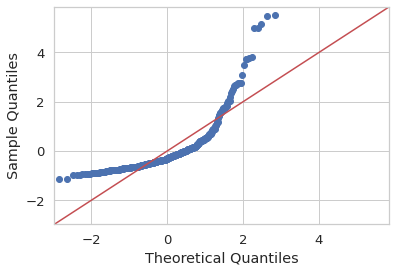

NameError: ignored

In [ ]:
model_residual = modelo1_fit.resid
model_y_adjusted = modelo1_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

## Normalizar ou padronizar as variáveis?

Pelo gráfico observa-se que a variável de interesse não tem uma distribuição normal. 

https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9


In [ ]:
# a variável leads tem aspecto normal?
fig = px.histogram(variaveis_interesse["leads"], x="leads")
fig.show()

In [ ]:
df_max_scaled = variaveis_interesse.copy() 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
display(df_max_scaled) 


,leads,cliques_por_lead,anuncio_por_vlrmercado,vlr_anuncio,km_veiculo,prioridade2,gasolina_alcool,automatico,ano_2013,flg_ipva_pago_sim,flg_licenciado_sim,cod_tipo_pessoa_2
16,0.29,0.34,-0.05,0.08,0.37,0.00,0.00,0.00,0.00,1.00,1.00,0.00
39,0.15,0.41,0.00,0.02,0.44,0.00,0.00,1.00,0.00,0.00,1.00,0.00
42,0.16,0.26,0.04,0.30,0.05,0.00,0.00,0.00,0.00,0.00,1.00,0.00
43,0.23,0.41,0.00,0.03,0.51,0.00,0.00,0.00,0.00,1.00,1.00,0.00
50,0.16,0.38,0.00,0.04,0.36,0.00,1.00,0.00,0.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
47901,0.19,0.23,-0.31,0.08,0.35,1.00,0.00,1.00,0.00,1.00,1.00,0.00
47903,0.19,0.60,-0.04,0.14,0.12,0.00,0.00,1.00,0.00,1.00,1.00,1.00
47906,0.40,0.15,-0.45,0.07,0.45,1.00,1.00,0.00,0.00,0.00,0.00,1.00
47907,0.22,0.42,-0.11,0.16,0.17,1.00,0.00,1.00,0.00,1.00,1.00,1.00


In [ ]:
# 0.009 - leads ~ prioridade2 + gasolina_alcool + automatico + ano_2013 + flg_ipva_pago_sim + flg_licenciado_sim + cod_tipo_pessoa_2
# R² = 0.032 - Adj. R² = 0.024 - leads ~ cliques_por_lead + anuncio_por_vlrmercado + vlr_anuncio + km_veiculo
# Ajuste do Modelo1: cinq_leads2
modelo2 = smf.ols(formula = 'leads ~ cliques_por_lead + anuncio_por_vlrmercado + vlr_anuncio + km_veiculo', data = df_max_scaled)
modelo2_fit = modelo2.fit()
modelo2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  leads   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.776
Date:                Sat, 06 Aug 2022   Prob (F-statistic):            0.00493
Time:                        16:20:09   Log-Likelihood:                 267.69
No. Observations:                 461   AIC:                            -525.4
Df Residuals:                     456   BIC:                            -504.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2905      0.023     12.415      0.000       0.245       0.336
cliques_por_lead          -0.0645      0.040     -1.598      0.111      -0.144       0.015
anuncio_por_vlrmercado    -0.0664      0.025     -2.699      0.007      -0.115      -0.018
vlr_anuncio               -0.1460      0.069     -2.122      0.034      -0.281      -0.011
km_veiculo                -0.0422      0.041     -1.027      0.305      -0.123       0.039
==============================================================================
Omnibus:                      287.476   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2137.905
Skew:                           2.733   Prob(JB):                         0.00
Kurtosis:                      12.024   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

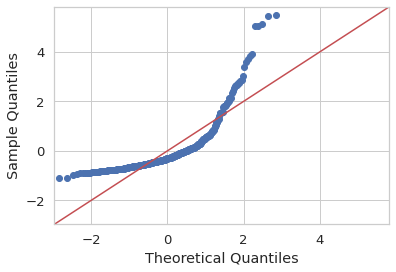

NameError: ignored

In [ ]:
model_residual = modelo2_fit.resid
model_y_adjusted = modelo2_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

In [ ]:
# a variável leads tem aspecto normal?
fig2 = px.histogram(df_max_scaled["leads"], x="leads")
fig.show()

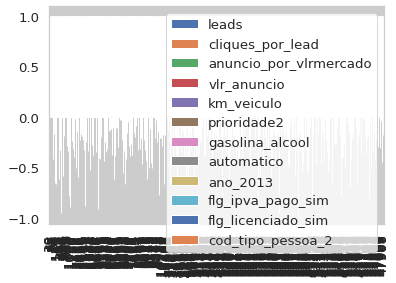

In [ ]:
import matplotlib.pyplot as plt 
df_max_scaled.plot(kind = 'bar')

In [ ]:
#inclusão do variável dependente 

# Ajuste do Modelo1: cinq_leads2
modelo1 = smf.ols(formula = 'leads ~ cliques_por_lead + flg_ipva_pago_sim + flg_licenciado_sim + prioridade2 + cod_tipo_pessoa_2 + ano_2013 + automatico + gasolina_alcool + km_veiculo + anuncio_por_vlrmercado', data = cinq_leads2)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  leads   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.565
Date:                Sat, 06 Aug 2022   Prob (F-statistic):              0.114
Time:                        13:55:58   Log-Likelihood:                -2450.5
No. Observations:                 461   AIC:                             4923.
Df Residuals:                     450   BIC:                             4969.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 94.7347     10.994      8.617      0.000      73.129     116.340
cliques_por_lead         -12.2747      7.387     -1.662      0.097     -26.792       2.242
flg_ipva_pago_sim         -4.0719      7.472     -0.545      0.586     -18.756      10.612
flg_licenciado_sim        -3.3810      7.255     -0.466      0.641     -17.639      10.877
prioridade2                0.2357      2.918      0.081      0.936      -5.498       5.969
cod_tipo_pessoa_2          2.6983      6.317      0.427      0.669      -9.717      15.113
ano_2013                   1.8120      7.943      0.228      0.820     -13.799      17.423
automatico                -1.3383      5.016     -0.267      0.790     -11.196       8.519
gasolina_alcool            4.2405      5.435      0.780      0.436      -6.440      14.921
km_veiculo             -3.267e-06   4.99e-05     -0.065      0.948      -0.000    9.48e-05
anuncio_por_vlrmercado    -0.8753      0.291     -3.005      0.003      -1.448      -0.303
==============================================================================
Omnibus:                      287.023   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2139.044
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      12.036   Cond. No.                     4.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#inclusão do variável dependente 

# Ajuste do Modelo1: cinq_leads2
modelo1 = smf.ols(formula = 'leads ~ leads + flg_ipva_pago_sim + flg_licenciado_sim ', data = cinq_leads2)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

In [ ]:
# Ajuste do Modelo1: cinq_leads2
modelo2 = smf.ols(formula = 'leads ~  cliques_por_lead', data = cinq_leads2)
modelo2_fit = modelo1.fit()
modelo2_fit.summary()

## ['leads'] == 1] - MODELO NÃO SIGNIFICATIVO

In [ ]:
um_leads2.replace([np.inf, -np.inf], np.nan)
um_leads2.dropna(inplace=True)

In [ ]:
um_leads2.isnull().sum()

In [ ]:
# Ajuste do Modelo1: cinq_leads2
modelo3 = smf.ols(formula = 'leads ~  cliques_por_lead + flg_ipva_pago_sim + flg_licenciado_sim + prioridade2 + cod_tipo_pessoa_2 + ano_2015 + manual + gasolina_alcool + km_veiculo + anuncio_por_vlrmercado', data = um_leads2)
modelo3_fit = modelo3.fit()
modelo3_fit.summary()

In [ ]:
# Ajuste do Modelo1: cinq_leads2
modelo4 = smf.ols(formula = 'leads ~  cliques_por_lead ', data = um_leads2)
modelo4_fit = modelo4.fit()
modelo4_fit.summary()

## ['leads'] == 0] - MODELO NÃO SIGNIFICATIVO

In [ ]:
zero_leads2.replace([np.inf, -np.inf], np.nan)
zero_leads2.dropna(inplace=True)

In [ ]:
zero_leads2.isnull().sum()

In [ ]:
# Ajuste do Modelo1: zero_leads2
modelo5 = smf.ols(formula = 'leads ~  cliques_por_lead + flg_ipva_pago_sim + flg_licenciado_sim + prioridade2 + cod_tipo_pessoa_2 + ano_2013 + automatico + gasolina_alcool + km_veiculo + anuncio_por_vlrmercado', data = zero_leads2)
modelo5_fit = modelo5.fit()
modelo5_fit.summary()

In [ ]:
# Ajuste do Modelo1: cinq_leads2
modelo6 = smf.ols(formula = 'leads ~  cliques_por_lead ', data = zero_leads2)
modelo6_fit = modelo6.fit()
modelo6_fit.summary()

# REGRESSÃO NÃO LINEAR?

In [ ]:
cinq_leads2.columns

Index(['leads', 'views_por_lead', 'cliques_por_lead', 'cliques_por_view',
       'anuncio_por_vlrmercado', 'vlr_anuncio', 'km_veiculo',
       'gasolina_alcool', 'combustivel_outros', 'manual', 'automatico',
       'cambio_outros', 'ano_2013', 'ano_2015', 'ano_outros',
       'cod_tipo_pessoa_2', 'flg_licenciado_sim', 'flg_ipva_pago_sim',
       'prioridade2'],
      dtype='object')

In [ ]:
xdata = cinq_leads2['leads']
ydata = cinq_leads2[['views_por_lead', 'cliques_por_lead', 'cliques_por_view',
       'anuncio_por_vlrmercado', 'vlr_anuncio', 'km_veiculo',
       'gasolina_alcool', 'combustivel_outros', 'manual', 'automatico',
       'cambio_outros', 'ano_2013', 'ano_2015', 'ano_outros',
       'cod_tipo_pessoa_2', 'flg_licenciado_sim', 'flg_ipva_pago_sim',
       'prioridade2']]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

def function(x, a, b):
   return a*x + b

scipy.optimize.curve_fit(cinq_leads2,
          xdata,
          ydata,
          sigma=None,
          p0=None)

TypeError: ignored

## ['leads'] > 52]

## ['leads'] == 1]

## ['leads'] == 0]

# QUANTO CADA LEAD AUMENTARIA EM MÉDIA SEGUINDO AS HIPÓTESE?

## MODELO HIPÓTESE 1: FLAG IPVA E LICENCIAMENTO 

In [ ]:
zero_leads = df_eda.loc[lambda df_eda: df_eda['leads'] == 0]
um_leads = df_eda.loc[lambda df_eda: df_eda['leads'] == 1]
cinq_leads = df_eda.loc[lambda df_eda: df_eda['leads'] > 52]


In [ ]:
um_leads.columns


Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'uf', 'cidade',
       'prioridade', 'leads', 'views', 'qtd_fotos', 'cliques_telefone',
       'views_por_lead', 'cliques_por_lead', 'cliques_por_view', 'vlr_anuncio',
       'vlr_mercado2', 'anuncio_por_vlrmercado', 'cod_marca_veiculo',
       'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'km_veiculo',
       'combustivel', 'portas', 'cambio', 'flg_unico_dono', 'flg_licenciado',
       'flg_ipva_pago', 'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'alarme',
       'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs', 'desembtras',
       'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva',
       'sensorestacion'],
      dtype='object')

In [ ]:
um_leads.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,23344.00,23344.00,23344.00,23344.00,23344.00,23344.00,23344.00,23344.00,23344.00,23344.00,23344.00
mean,1.00,522.92,6.45,4.28,522.92,4.28,inf,53841.99,53755.90,0.19,68694.98
std,0.00,1141.16,2.35,4.20,1141.16,4.20,NaN,50119.13,49504.93,14.29,89206.52
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,4900.00,5500.00,-74.57,0.00
25%,1.00,96.00,6.00,2.00,96.00,2.00,0.00,30990.00,31321.05,-2.39,29976.25
50%,1.00,232.00,8.00,3.00,232.00,3.00,0.01,40000.00,40559.61,0.00,58000.00
75%,1.00,524.00,8.00,6.00,524.00,6.00,0.05,60900.00,60969.05,2.30,89827.00
95%,1.00,1980.00,8.00,11.00,1980.00,11.00,0.38,125900.00,124990.00,9.38,150000.00
99%,1.00,4661.12,8.00,19.00,4661.12,19.00,3.25,249900.00,248380.79,17.87,256189.81
max,1.00,71020.00,18.00,63.00,71020.00,63.00,inf,1300000.00,1300000.00,1969.49,999999.00


In [ ]:
um_leads.describe(include=['category'])

,cod_anuncio,cod_cliente,cod_tipo_pessoa,uf,cidade,prioridade,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,combustivel,portas,cambio,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,23344,23344,23344,23344,23344,23344,23344,23344,23344,23344,23343,23343.00,23343,23344,23344,23344.00,23344.00,23344,23344.00,23344,23344,23344.00,23343,23344,23343,23343,23343,23343,23343,23343,23343,23343,23343,23343
unique,23344,8693,2,27,785,3,55,55,55,59,10,4.00,7,2,2,2.00,2.00,2,2.00,2,2,2.00,2,2,2,2,2,2,2,2,2,2,2,2
top,2,525,2,SP,SÃ£o Paulo,3,2,2,2,2015,gasolina e alcool,4.00,manual,0,0,0.00,0.00,0,0.00,0,0,0.00,S,S,S,N,S,S,S,S,S,S,N,N
freq,1,61,21951,9341,3054,19479,3517,3517,3517,3020,18011,21070.00,13933,19297,17821,15706.00,20849.00,22522,21795.00,23030,22523,23339.00,13713,15240,13998,16788,19675,14343,14150,19523,19425,11976,21830,17300


In [ ]:
um_leads.loc[(um_leads['prioridade'] ==1) & (um_leads['flg_ipva_pago'] ==0),['cod_tipo_pessoa','prioridade','leads','cliques_por_lead','flg_ipva_pago','anuncio_por_vlrmercado']]

,cod_tipo_pessoa,prioridade,leads,cliques_por_lead,flg_ipva_pago,anuncio_por_vlrmercado
20,1,1,1,12.00,0.00,0.00
40,1,1,1,15.00,0.00,0.00
127,1,1,1,0.00,0.00,0.00
154,2,1,1,0.00,0.00,-21.37
180,1,1,1,3.00,0.00,0.00
...,...,...,...,...,...,...
47975,2,1,1,1.00,0.00,0.00
47984,2,1,1,1.00,0.00,-2.55
47989,2,1,1,3.00,0.00,13.07
48105,2,1,1,7.00,0.00,0.00


In [ ]:
um_leads.loc[(um_leads['prioridade'] ==2) & (um_leads['flg_ipva_pago'] ==0)& (um_leads['cod_tipo_pessoa'] ==2) ,['cod_tipo_pessoa','prioridade','leads','cliques_por_lead','flg_ipva_pago','anuncio_por_vlrmercado']]

,cod_tipo_pessoa,prioridade,leads,cliques_por_lead,flg_ipva_pago,anuncio_por_vlrmercado
1544,2,2,1,2.00,0.00,-12.30
1639,2,2,1,2.00,0.00,-9.40
1733,2,2,1,2.00,0.00,-5.89
1786,2,2,1,5.00,0.00,-1.39
1825,2,2,1,3.00,0.00,-5.82
...,...,...,...,...,...,...
40637,2,2,1,16.00,0.00,0.00
42267,2,2,1,16.00,0.00,0.00
42501,2,2,1,18.00,0.00,-3.78
44950,2,2,1,4.00,0.00,0.00


In [ ]:
um_leads.loc[(um_leads['prioridade'] ==3) & (um_leads['flg_ipva_pago'] ==0),['cod_tipo_pessoa','leads','prioridade','flg_ipva_pago','anuncio_por_vlrmercado']]

,leads,prioridade,flg_ipva_pago
0,1,3,0.00
1,1,3,0.00
48,1,3,0.00
71,1,3,0.00
77,1,3,0.00
...,...,...,...
48657,1,3,0.00
48658,1,3,0.00
48660,1,3,0.00
48661,1,3,0.00


In [ ]:
um_leads.loc[(um_leads['prioridade'] ==1) & (um_leads['flg_ipva_pago'] ==1),['cod_tipo_pessoa','leads','prioridade','flg_ipva_pago','anuncio_por_vlrmercado']]

,cod_tipo_pessoa,leads,prioridade,flg_ipva_pago,anuncio_por_vlrmercado
12,1,1,1,1.00,84.30
14,1,1,1,1.00,0.00
17,1,1,1,1.00,0.00
24,1,1,1,1.00,0.00
33,1,1,1,1.00,0.00
...,...,...,...,...,...
48155,1,1,1,1.00,0.00
48180,1,1,1,1.00,-1.86
48186,1,1,1,1.00,0.29
48199,1,1,1,1.00,0.00


In [ ]:
um_leads2.loc[(um_leads2['prioridade2'] ==2) & (um_leads2['flg_ipva_pago_sim'] ==0),['leads','prioridade2','flg_ipva_pago_sim']]

,leads,prioridade2,flg_ipva_pago_sim
0,1.00,2.00,0.00
1,1.00,2.00,0.00
98,1.00,2.00,0.00
170,1.00,2.00,0.00
178,1.00,2.00,0.00
...,...,...,...
48184,1.00,2.00,0.00
48198,1.00,2.00,0.00
48204,1.00,2.00,0.00
48207,1.00,2.00,0.00


In [ ]:
um_leads2.loc[(um_leads2['prioridade2'] == 3) & (um_leads2['flg_ipva_pago_sim'] ==0),['leads','prioridade2','flg_ipva_pago_sim']]

,leads,prioridade2,flg_ipva_pago_sim


In [ ]:
um_leads2.loc[um_leads2(um_leads2['prioridade']==3)& (um_leads2['flg_licenciado']==1) & (um_leads2['flg_ipva_pago']==1)])

SyntaxError: ignored

In [ ]:
df_eda.loc[(df_eda['prioridade']==3)& (df_eda['leads']==1)].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

# MODELO HIPÓTESE: PRIORIDADE BAIXA PARA ALTA

In [ ]:
#Pego a base completa

df_eda.loc[(df_eda['prioridade']==3)& (df_eda['leads']==1)].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)


,leads,views,qtd_fotos,cliques_telefone,views_por_lead,cliques_por_lead,cliques_por_view,vlr_anuncio,vlr_mercado2,anuncio_por_vlrmercado,km_veiculo
count,19479.00,19479.00,19479.00,19479.00,19479.00,19479.00,19479.00,19479.00,19479.00,19479.00,19479.00
mean,1.00,524.11,6.38,4.12,524.11,4.12,inf,52563.55,52410.64,0.33,70973.39
std,0.00,1207.88,2.40,3.94,1207.88,3.94,NaN,48748.60,47999.61,15.43,93174.51
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,4900.00,5500.00,-43.34,0.00
25%,1.00,92.00,6.00,1.00,92.00,1.00,0.00,29900.00,29827.33,-2.23,30000.00
50%,1.00,224.00,8.00,3.00,224.00,3.00,0.01,39900.00,39701.50,0.00,60000.00
75%,1.00,512.00,8.00,6.00,512.00,6.00,0.05,59900.00,59506.79,2.49,91540.00
95%,1.00,1940.40,8.00,11.00,1940.40,11.00,0.35,124900.00,123883.37,9.55,154006.80
99%,1.00,5026.64,8.00,17.00,5026.64,17.00,2.25,239000.00,239511.94,18.01,280000.00
max,1.00,71020.00,18.00,63.00,71020.00,63.00,inf,1300000.00,1300000.00,1969.49,999999.00


In [ ]:
df_eda.describe(include=['category'])

In [ ]:
prioridade = df_eda

In [ ]:
df_tratado['vlr_mercado2']=np.where (df_tratado['vlr_mercado'].isnull(), df_tratado['vlr_anuncio'],df_tratado['vlr_mercado'])

Apesar de não ter conseguido comprovar o modelo pela regressão (já que não é linear)

# REGRESSÃO LOGÍSTICA - 

A regressão logística modela a probabilidade de um evento ocorrer de acordo com as variáveis independentes. Ela calcula a probabilidade (número entre 0 e 1) de que uma observação esteja em determinada categoria, através de uma função sigmoide (função matemática cujo nome vem da forma em S do seu gráfico).

# MODELO ÁRVORE DE DECISÃO

In [ ]:
df_lr2.columns

In [ ]:
sns.pairplot(df, x_vars=['diagnostico'], y_vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'], hue='diagnostico')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
y_pred_dtree = nb.predict(X_test)

ValueError: ignored

In [ ]:
# Ajuste do Modelo1
modelo1 = smf.ols(formula = 'leads ~  views_por_lead + cliques_por_lead', data = df_lr)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()


MissingDataError: ignored

In [ ]:
import pandas as pd



from statsmodels.formula.api as sm

X = df_lr[[ 'flg_ipva_pago_sim' , 'prioridade2', 'gasolina e alcool']]
X = sm.add_constant(X)

y = df_lr['leads']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = sm.ols(y_train, X_train)
results = model.fit()

results.summary()


SyntaxError: ignored

In [ ]:
+ cliques_por_view + anuncio_por_vlrmercado + vlr_anuncio + km_veiculo + cod_tipo_pessoa + uf' 'prioridade', 'combustivel', 'cambio',
       'ano_modelo', 'flg_licenciado', 'flg_ipva_pago', 'combustivel_2',
       'cambio_2', 'ano_modelo_2', 'gasolina e alcool', 'combustivel_outros',
       'manual', 'automatico', 'cambio_outros', 'ano_2013', 'ano_2015',
       'ano_outros', 'cod_tipo_pessoa_1', 'cod_tipo_pessoa_2',
       'flg_licenciado_não', 'flg_licenciado_sim', 'flg_ipva_pago_não',
       'flg_ipva_pago_sim', 'prioridade2'

In [ ]:
from sklearn.linear_model import LinearRegression

rls = LinearRegression()
rls.fit(X_train[['LSTAT']], y_train)

KeyError: ignored

In [ ]:
#zero_leads = df_eda.loc[lambda df_eda: df_eda['leads'] == 0]
#um_leads = df_eda.loc[lambda df_eda: df_eda['leads'] == 1]
#cinq_leads = df_eda.loc[lambda df_eda: df_eda['leads'] > 52]

In [ ]:
#Verificar outliers
#vlr_anuncio - max = 122_000_000.00    
#km_veiculo  - max = 2_147_483_647.00  

leads_df.loc[(leads_df['km_veiculo']== 2147483647.00),['cod_modelo_veiculo','ano_modelo','km_veiculo','vlr_mercado','vlr_anuncio']]


# MODELO ÁRVORE DE DECISÃO

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf

NameError: ignored

# Análise descritiva

In [ ]:
#Os dados case_df foram divididos em três grupos:

#sem_leads (sem limpeza)
#com_leads (sem limpeza)
#leads_df (case_df com limpeza)

#Uma análise dos dados:

## Numéricos

In [ ]:
#case_df representa dados originais
case_df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

In [ ]:
#com_leads representa dados originais filtrados leads > 0

# observações sobre com_leads.describe
#valor de anúncio mínimo = 0. 
#0 views. Como ele pode ter virado um lead sem ter tido view???
# valor de anúncio e km altíssimos, descrepante em relação ao valor de mercado. 

com_leads.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

In [ ]:
#sem_leads representa dados originais filtrados leads == 0

# observações sobre sem_leads.describe
#99% possuem bastante views e possuem telefonema, por qual motivo não viram leads??? Poderia ser um robô?
# clique no telefone não significa ter leads ( propostas recebidas), mas possuem correlação. 

sem_leads.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

In [ ]:
#leads_df representa dados originais filtrados leads > 0; excluiu vlr_mercado = 0; preencheu nan flags = 0; outliers retirados

#observações sobre leads_df
#possui maior quantidade de leads nos 1% dos dados 

leads_df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

In [ ]:
#leads_df.loc[(leads_df['vlr_anuncio']> 1111215.64),['cod_modelo_veiculo','ano_modelo','km_veiculo','vlr_mercado','vlr_anuncio', 'leads']]

leads_df.loc[(leads_df['leads']==1),['views_por_lead','views','leads']]

## Categóricos

In [ ]:
case_df.describe(include=['category'])

In [ ]:
com_leads.describe(include=['category'])

In [ ]:
sem_leads.describe(include=['category'])

In [ ]:
leads_df.describe(include=['category'])

# Leads maiores - 1% > 55 leads

In [ ]:
#observado que dos Leads_df 1% dos dados apresentam valor acim de 56.00. 
#Irei observar esses dados para o modelo de regressão. 

leads_maiores= leads_df.sort_values('leads', ascending=False).head(331)
leads_maiores

In [ ]:
leads_maiores.describe(include=['category'])

In [ ]:
leads_maiores.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

In [ ]:
uf = pd.DataFrame(leads_maiores['uf'].value_counts())
uf = uf.loc[(uf['uf']> 0)]
uf


In [ ]:
cidade = pd.DataFrame(leads_maiores['cidade'].value_counts())
cidade = cidade.loc[(cidade['cidade']> 0)]
cidade


In [ ]:
leads_maiores['combustivel'].value_counts()

In [ ]:
#0 portas são os nan ou motos... dúvida!
#eu deveria ter filtrado para preencher
leads_maiores['portas'].value_counts()


In [ ]:
leads_maiores.loc[(leads_maiores['cod_modelo_veiculo']==5),['cod_modelo_veiculo','portas','ano_modelo','km_veiculo','vlr_mercado','vlr_anuncio', 'leads']]
#leads_maiores.loc[(leads_maiores['portas']== 0),['cod_modelo_veiculo','portas','ano_modelo','km_veiculo','vlr_mercado','vlr_anuncio', 'leads']]


In [ ]:
#salvar dados limpos 
leads_maiores.to_csv('leads_maiores.csv')

# Encoding variáveis de interesse

In [ ]:
#transformando uf para OneHotEncoder
conditions_uf = [
  (leads_maiores['uf']=='SP'),
  (leads_maiores['uf']=='RJ'),
  (leads_maiores['uf']!='SP') & (leads_maiores['uf']!='RJ')] #outros além de SP e RJ
    
    
values_uf = [1, 2, 3]

leads_maiores["uf_2"] = np.select(conditions_uf, values_uf) # Construindo variável

leads_maiores[["uf_2"]].value_counts(sort = False) # Avaliando frequencia

In [ ]:
#transformando combustivel para OneHotEncoder   - gasolina cara, ter a opção do álcool favorece.
#
##gasolina e alcool                          217
#gasolina                                    94
#diesel                                      15
#outros                                      
           


conditions_comb = [
  (leads_maiores['combustivel']=='gasolina e alcool'),
  (leads_maiores['combustivel']=='gasolina'),
  (leads_maiores['combustivel']=='diesel'),
  (leads_maiores['combustivel']!='gasolina e alcool') & (leads_maiores['combustivel']!='gasolina')
    & (leads_maiores['combustivel']!='diesel')] #outros
    
    
values_comb = [1, 2, 3,4] #4 = outros

leads_maiores["combustivel_2"] = np.select(conditions_comb, values_comb) # Construindo variável

leads_maiores[["combustivel_2"]].value_counts(sort = False) # Avaliando frequencia


In [ ]:
dummies= pd.get_dummies(leads_maiores, columns=[
                                          'flg_unico_dono',
                                          'flg_licenciado', 
                                          'flg_ipva_pago',
                                           'flg_todas_revisoes_concessionaria',
                                           'flg_todas_revisoes_agenda_veiculo', 
                                           'flg_garantia_fabrica',
                                           'flg_blindado', 
                                          'flg_aceita_troca', 
                                          'flg_adaptado_pcd', 
                                          
                                          
                                          'alarme', 
                                          'airbag', 
                                          'arquente', 
                                          'bancocouro',
                                          'arcondic', 
                                          'abs', 
                                          'desembtras', 
                                          'travaeletr', 
                                          'vidroseletr',
                                          'rodasliga', 
                                          'sensorchuva', 
                                          'sensorestacion'], drop_first=True)


dummies.drop("uf'
             'cidade'
             'uf' 	cidade
             ")

In [ ]:
OneHotEncoder = OneHotEncoder().fit_transform(leads_df[['uf_2'                    
                                              ]]).toarray() #Codifica a variavel de n niveis em n variaveis


nom = pd.DataFrame(nom)
nom.rename(columns = {0:'SP', 
                       1:'cod_tipo_pessoa_PJ',
                       
                       2:'flg_licenciado_nao', 
                       3:'flg_licenciado_sim',
                       
                       4:'flg_ipva_pago_nao', 
                       5:'flg_ipva_pago_sim'
                                        }, inplace = True) #Atribui nome pra identificação

nom
                       

In [ ]:
# resolvi excluir algumas que não considero significativas para o modelo
#  'cod_anuncio',
#  'cidade',
#  'portas'
#  'cambio',


#como não consegui separar por categorias e ter muitos modelos, vou retirar do meu modelo, mesmo tendo a dúvida se ele afetaria.
# 'cod_marca_veiculo
# 'cod_modelo_veiculo', 
# 'cod_versao_veiculo', 

    
    
    
#UF principais : eu categorizei para facilitar
# 'uf', 
# SP
# RJ
# outros    
    
    
       
    
#talvez separar por classe 'ano_modelo', já que observei a frequência maior entre 2013 - 2016. Mas desisti.            

#Tive a ideia de classificar km ao invés de deixá-lo como número...acho que influenciaria já que observei uma média na km 
# entre 100 mil a 500 mil km.  Desisti da ideia
# 'km_veiculo',
#categorizei conforme manutenção
#novo: 0 a 10 mil quilômetros
#baixa: 10 mil quilômetros a 100
#média:100 mil quilômetros a 500
#alta: acima 500 mil quilômetros
  
#conditions_km = [
#  (leads_maiores['km_veiculo'] <= 10_000),
#  (leads_maiores['km_veiculo']>10_000) & (leads_maiores['km_veiculo']<=100_000),
#  (leads_maiores['km_veiculo']>100_000) & (leads_maiores['km_veiculo']<=500_000),
#  (leads_maiores['km_veiculo']>500_000)]
#
#values_km = [1, 2, 3, 4]
#
#db2["km_veiculo_2"] = np.select(conditions_km, values_km) # Construindo variável
#
#db2[["km_veiculo_2"]].value_counts(sort = False) # Avaliando frequencia#
#




#talvez separar por classe   'combustivel',já que a gasolina anda caro ter a opção de alcool pode ser uma boa variável. 
#
##gasolina e alcool                          217
#gasolina                                    94
#diesel                                      15
#outros                                      
                                         
                                          


# dummies
'cod_cliente', 
'cod_tipo_pessoa',

#ordinal
'prioridade', 







case_df = pd.DataFrame(case_df, columns =[ 
                                          

                                          
                                         
                                         
                                          
                                         
                                          
                                          
                                           
                                          
                                          'flg_unico_dono',
                                          'flg_licenciado', 
                                          'flg_ipva_pago',
                                           'flg_todas_revisoes_concessionaria',
                                           'flg_todas_revisoes_agenda_veiculo', 
                                           'flg_garantia_fabrica',
                                           'flg_blindado', 
                                          'flg_aceita_troca', 
                                          'flg_adaptado_pcd', 
                                          
                                          
                                          'alarme', 
                                          'airbag', 
                                          'arquente', 
                                          'bancocouro',
                                          'arcondic', 
                                          'abs', 
                                          'desembtras', 
                                          'travaeletr', 
                                          'vidroseletr',
                                          'rodasliga', 
                                          'sensorchuva', 
                                          'sensorestacion', 
                                          ])

# Dados Modelo Regressão - Anúncio receberá lead ? 

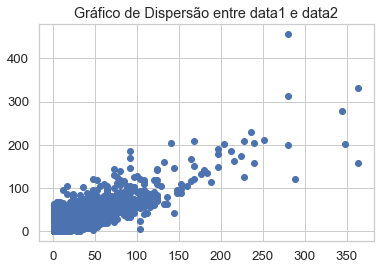

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(leads_df['leads'], leads_df['cliques_telefone'])
plt.title('Gráfico de Dispersão entre leads e cliques')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(variaveis, preco, test_size=0.2, random_state=42)

In [ ]:
leads_maiores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 26207 to 46384
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   cod_anuncio                        331 non-null    category
 1   cod_cliente                        331 non-null    category
 2   cod_tipo_pessoa                    331 non-null    category
 3   uf                                 331 non-null    category
 4   cidade                             331 non-null    category
 5   prioridade                         331 non-null    category
 6   leads                              331 non-null    int64   
 7   views                              331 non-null    int64   
 8   qtd_fotos                          331 non-null    int64   
 9   cliques_telefone                   331 non-null    int64   
 10  views_por_lead                     331 non-null    float64 
 11  cliques_por_lead                   331 

In [ ]:
#df_lr =pd.read_csv("leads_maiores.csv", header = 0)
#df_lr.info()

## Enconding

In [ ]:
df_lr = leads_maiores.copy()
df_lr.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'leads',
       'views', 'views_por_lead', 'cliques_telefone', 'cliques_por_lead',
       'anuncio_por_vlrmercado', 'cliques_por_views', 'cod_marca_veiculo',
       'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'cep_2dig',
       'uf_cidade', 'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [ ]:
# Variavel de interesse
target = 'leads'
print('target:', target)

# Variaveis numericas
num_vars = df_lr.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df_lr.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

target: leads
numerical vars(10): ['views', 'views_por_lead', 'cliques_telefone', 'cliques_por_lead', 'anuncio_por_vlrmercado', 'cliques_por_views', 'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado']
categorical vars(34): ['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'cod_marca_veiculo', 'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'cep_2dig', 'uf_cidade', 'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago', 'flg_todas_revisoes_concessionaria', 'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica', 'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel', 'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva', 'sensorestacion']


In [ ]:
df_lr[df_lr['uf_cidade'].str.contains('SP')].head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,views_por_lead,cliques_telefone,cliques_por_lead,anuncio_por_vlrmercado,cliques_por_views,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
8508,34821,13654,1,1,364,48,0.13,332,0.91,-14.94,6.92,17,17,17,2017,2,SP_SÃ£o Paulo,81000.00,8,20000,95222.53,0,1,1.00,1.00,1,1.00,0,0,0.00,gasolina e alcool,automatico,4.00,S,S,S,S,S,S,S,S,S,S,S,S
47868,140393,4155,2,3,348,392,1.13,201,0.58,-10.51,0.51,16,16,16,2004,3,SP_SÃ£o Paulo,16990.00,1,110000,18985.25,0,1,1.00,0.00,0,0.00,0,0,0.00,gasolina,manual,4.00,S,S,S,N,S,N,S,S,S,N,N,N
23352,94146,35484,1,3,344,184,0.53,279,0.81,-8.63,1.52,16,16,16,2017,1,SP_SÃ£o Paulo,56000.00,8,14000,61291.11,1,1,1.00,1.00,1,1.00,0,1,0.00,gasolina e alcool,automatico,4.00,S,S,S,N,S,S,N,S,S,N,N,N
23775,95856,2294,2,3,288,188,0.65,122,0.42,-22.13,0.65,17,17,17,2012,5,SP_SÃ£o Paulo,29000.00,6,65896,37243.91,0,0,0.00,0.00,0,0.00,0,0,0.00,gasolina,automatico,4.00,N,N,N,N,S,N,N,S,S,S,N,N
2567,10777,1033,1,1,280,8,0.03,312,1.11,0.86,39.00,2,2,2,2015,1,SP_SÃ£o Paulo,26500.00,8,26000,26274.08,1,1,1.00,1.00,1,0.00,0,0,0.00,gasolina e alcool,manual,4.00,S,S,S,N,S,S,S,S,S,N,N,N


In [ ]:
# Endereço - desmembrando variável endereço em seus três componentes e colocando no dataframe cada um 
for i in df_lr.index:
    try:
        lista_endereco = df_lr.loc[i, 'uf_cidade'].split('_')
        if len(lista_endereco) == 1:
            df_lr.loc[i, 'uf'] = lista_endereco[0]
            df_lr.loc[i, 'cidade'] = None
        elif len(lista_endereco) ==2:
            df_lr.loc[i, 'uf'] = lista_endereco[0]
            df_lr.loc[i, 'cidade'] = lista_endereco[1]
        else: 
            df_lr.loc[i, 'endereco2'] = lista_endereco
    except Exception as e:
        print(i)
        print(df_lr.loc[i, 'uf_cidade'])


In [ ]:
df_lr

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,views_por_lead,cliques_telefone,cliques_por_lead,anuncio_por_vlrmercado,cliques_por_views,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion,uf,cidade
26207,105947,3844,2,3,364,220,0.60,159,0.44,0.61,0.72,4,4,4,2004,21,RJ_Rio de Janeiro,12900.00,7,88888,12821.36,0,1,1.00,0.00,0,0.00,0,0,0.00,gasolina e alcool,manual,4.00,S,N,S,N,S,N,S,S,S,S,N,N,RJ,Rio de Janeiro
8508,34821,13654,1,1,364,48,0.13,332,0.91,-14.94,6.92,17,17,17,2017,2,SP_SÃ£o Paulo,81000.00,8,20000,95222.53,0,1,1.00,1.00,1,1.00,0,0,0.00,gasolina e alcool,automatico,4.00,S,S,S,S,S,S,S,S,S,S,S,S,SP,SÃ£o Paulo
47868,140393,4155,2,3,348,392,1.13,201,0.58,-10.51,0.51,16,16,16,2004,3,SP_SÃ£o Paulo,16990.00,1,110000,18985.25,0,1,1.00,0.00,0,0.00,0,0,0.00,gasolina,manual,4.00,S,S,S,N,S,N,S,S,S,N,N,N,SP,SÃ£o Paulo
23352,94146,35484,1,3,344,184,0.53,279,0.81,-8.63,1.52,16,16,16,2017,1,SP_SÃ£o Paulo,56000.00,8,14000,61291.11,1,1,1.00,1.00,1,1.00,0,1,0.00,gasolina e alcool,automatico,4.00,S,S,S,N,S,S,N,S,S,N,N,N,SP,SÃ£o Paulo
23775,95856,2294,2,3,288,188,0.65,122,0.42,-22.13,0.65,17,17,17,2012,5,SP_SÃ£o Paulo,29000.00,6,65896,37243.91,0,0,0.00,0.00,0,0.00,0,0,0.00,gasolina,automatico,4.00,N,N,N,N,S,N,N,S,S,S,N,N,SP,SÃ£o Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44045,126290,9838,2,2,56,304,5.43,29,0.52,-19.36,0.10,16,16,16,2012,21,RJ_Rio de Janeiro,30900.00,7,100,38316.15,0,0,1.00,0.00,0,0.00,0,0,0.00,gasolina e alcool,manual,4.00,N,N,N,N,S,N,N,S,S,N,N,N,RJ,Rio de Janeiro
46437,84595,15146,1,1,56,156,2.79,50,0.89,-3.21,0.32,21,21,21,2012,3,SP_SÃ£o Paulo,29990.00,4,49000,30983.27,0,1,1.00,1.00,1,0.00,0,1,0.00,gasolina e alcool,automatico,4.00,S,S,S,N,S,S,S,S,S,N,N,N,SP,SÃ£o Paulo
37184,180858,1721,1,3,56,1212,21.64,24,0.43,-1.42,0.02,27,27,27,2011,5,SP_SÃ£o Paulo,28500.00,8,109000,28911.52,1,1,1.00,1.00,1,0.00,0,0,0.00,gasolina e alcool,manual,4.00,S,S,S,N,S,S,S,S,S,S,N,N,SP,SÃ£o Paulo
43559,132796,30458,1,1,56,340,6.07,25,0.45,-6.26,0.07,218,218,218,2018,5,SP_SÃ£o Paulo,102000.00,7,10700,108807.51,1,1,1.00,0.00,0,1.00,0,1,0.00,gasolina e alcool,automatico,4.00,S,S,S,N,S,S,S,S,S,S,N,N,SP,SÃ£o Paulo


C:\Users\Andreia\AppData\Local\Temp\ipykernel_3788\2616393363.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))


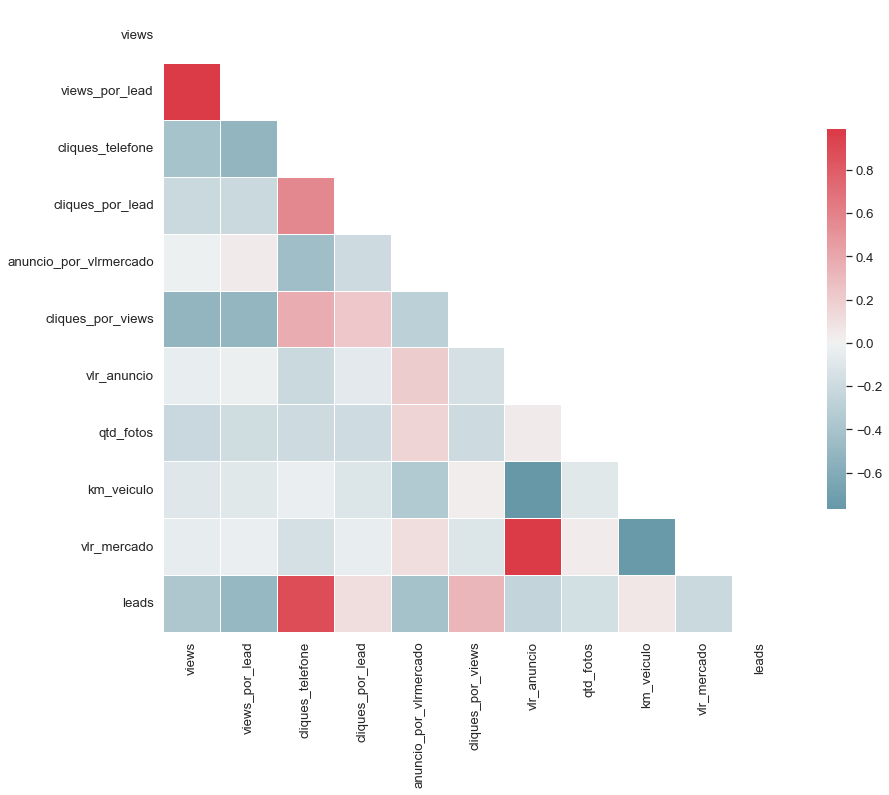

In [ ]:
corr_matrix = df_lr[num_vars + [target]].corr()
plot_corr_matrix(corr_matrix)

In [ ]:
nominal = pd.get_dummies(df_lr, columns=['flg_unico_dono', 
                                       'flg_licenciado', 
                                       'flg_ipva_pago', 
                                       'flg_todas_revisoes_concessionaria', 
                                       'flg_todas_revisoes_agenda_veiculo', 
                                       'flg_garantia_fabrica', 
                                       'flg_blindado', 
                                       'flg_aceita_troca', 
                                       'flg_adaptado_pcd', 
                                       ], drop_first=True)

ordinal = OrdinalEncoder().fit_transform(df_lr[['prioridade']])


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
'cod_anuncio', 
                                       'cod_cliente', 
                                       'cod_tipo_pessoa', 
                                       'prioridade', 
                                       'cod_marca_veiculo', 
                                       'cod_modelo_veiculo', 
                                       'cod_versao_veiculo', 
                                       'ano_modelo', 
                                       'cep_2dig', 
                                       'uf_cidade',

In [ ]:
'combustivel', 
                                       'cambio', 
                                       'portas', 
                                       'alarme', 
                                       'airbag', 
                                       'arquente', 
                                       'bancocouro', 
                                       'arcondic', 
                                       'abs', 
                                       'desembtras', 
                                       'travaeletr', 
                                       'vidroseletr', 
                                       'rodasliga', 
                                       'sensorchuva', 
                                       'sensorestacion'

In [ ]:
#nominais
nom = OneHotEncoder().fit_transform(leads_df[['cod_tipo_pessoa',
                                               'flg_licenciado',
                                               'flg_ipva_pago',
                                                                                            
                                              ]]).toarray() #Codifica a variavel de n niveis em n variaveis


nom = pd.DataFrame(nom)
nom.rename(columns = {0:'cod_tipo_pessoa_PF', 
                       1:'cod_tipo_pessoa_PJ',
                       
                       2:'flg_licenciado_nao', 
                       3:'flg_licenciado_sim',
                       
                       4:'flg_ipva_pago_nao', 
                       5:'flg_ipva_pago_sim'
                                        }, inplace = True) #Atribui nome pra identificação

nom
                       

In [ ]:
#variáveis significativas

#cod_tipo_pessoa - nominal - tipo de anunciante: PF=1, PJ=2
#prioridade - ordinal - prioridade do anúncio (1=alta, 2-média, 3-baixa)
#flg_licenciado - nominal - indicador de licenciamento em dia
#flg_ipva_pago - nominal  - indicador de IPVA em dia

#Importando as funções de pré processamento
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
#ordinal

prio = OrdinalEncoder().fit_transform(leads_maiores[['prioridade']]) #Codifica a variavel de n niveis em n variaveis

prio = pd.DataFrame(prio)
prio.rename(columns = { 0:'prioridade'}, inplace = True) #prioridade do anúncio (0:1=alta, 1:2-média, 2:3-baixa) 

prio
                      

In [ ]:
df_m1 = pd.DataFrame(leads_maiores[['leads', 'vlr_mercado']])
df_m1 = pd.concat([df_m1, nom, prio], axis=1, join='inner')


In [ ]:
df_m1.drop(columns = ['cod_tipo_pessoa_PJ','flg_licenciado_nao','flg_ipva_pago_nao'])

In [ ]:
import statsmodels.formula.api as smf

# Ajuste do Modelo1
modelo1 = smf.ols(formula = 'leads ~  vlr_mercado + cod_tipo_pessoa_PF + flg_licenciado_sim  + flg_ipva_pago_sim + prioridade', data = df_m1)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

In [ ]:
lr_vars = ['vlr_mercado', 'cod_tipo_pessoa_PF', 'flg_licenciado_sim', 'flg_ipva_pago_sim', 'prioridade'] # R2 0.824
plot_vif(calc_vif(df_lr[lr_vars]))


In [ ]:
# Ajuste do Modelo1
modelo1_v1 = smf.ols(formula = 'leads ~ prioridade', data = df_m1)
modelo1_v1fit = modelo1_v1.fit()
modelo1_v1fit.summary()

# Dados Modelo Regressão - Modelo Explicativo

In [ ]:
df_lr 

In [ ]:
# Variavel de interesse
target = 'leads'
print('target:', target)

# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

In [ ]:
#acrescentar variáveis importantes para análise

#abaixo de 100.00 valor anúncio menor que o valor do mercado. veículo mais barato.
perc_vlr = ((leads_maiores["vlr_anuncio"] / leads_maiores["vlr_mercado"]))*100
#acima de 100.00 quantidade cliques maior que quantidade de demostração de interesse.
perc_cliques = ((leads_maiores["cliques_telefone"] / leads_maiores["leads"]))*100